# Allen Institute Visual Behavior 2P dataset overview
### This dataset consists of neural activity measured with 2-photon calcium imaging in the visual cortex of mice performing an image change detection task.
##### In this task, mice learn to report changes in stimulus identity by licking a spout to earn a water reward.


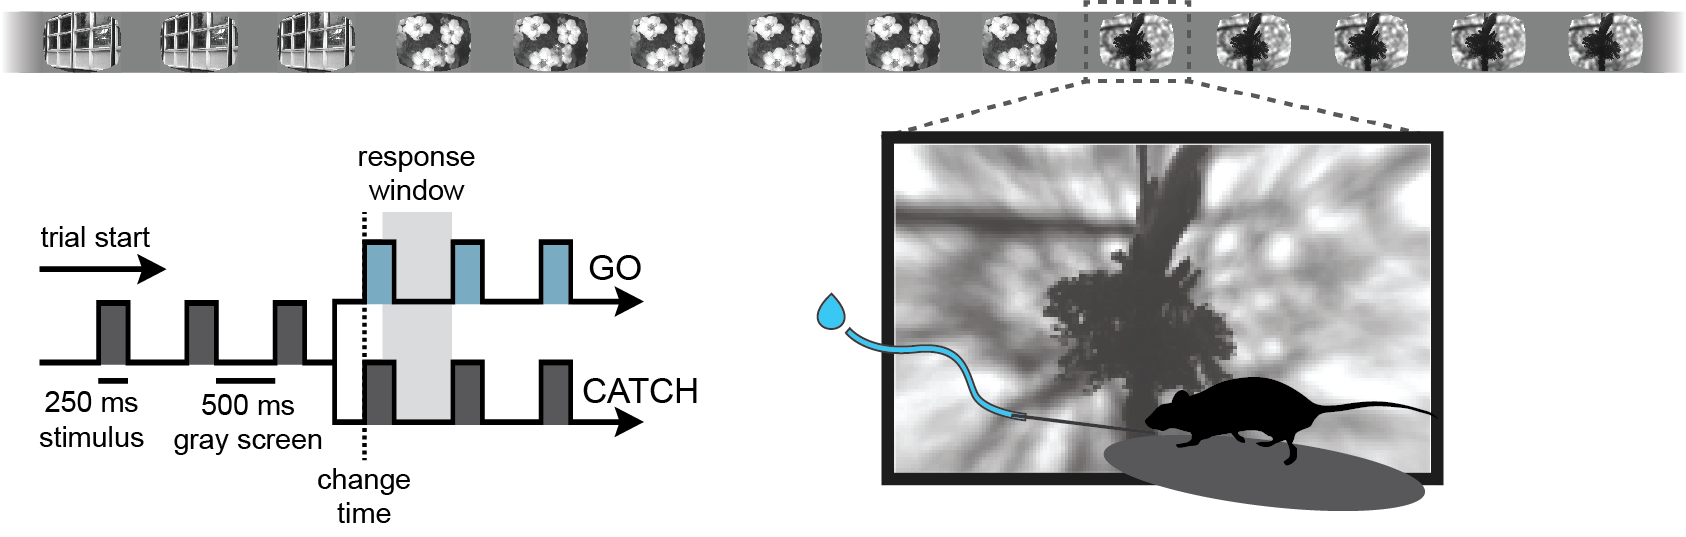

##### In some sessions, the mice perform the task with familiar images they have seen many times during training. In other sessions, mice perform the task with novel images.
##### During 2-photon imaging sessions, 5% of stimulus presentations are randomly omitted, allowing us to examine the effect of unexpected events on neural activity.
##### The same population of cells is imaged over multiple days with varying sensory and behavioral conditions.


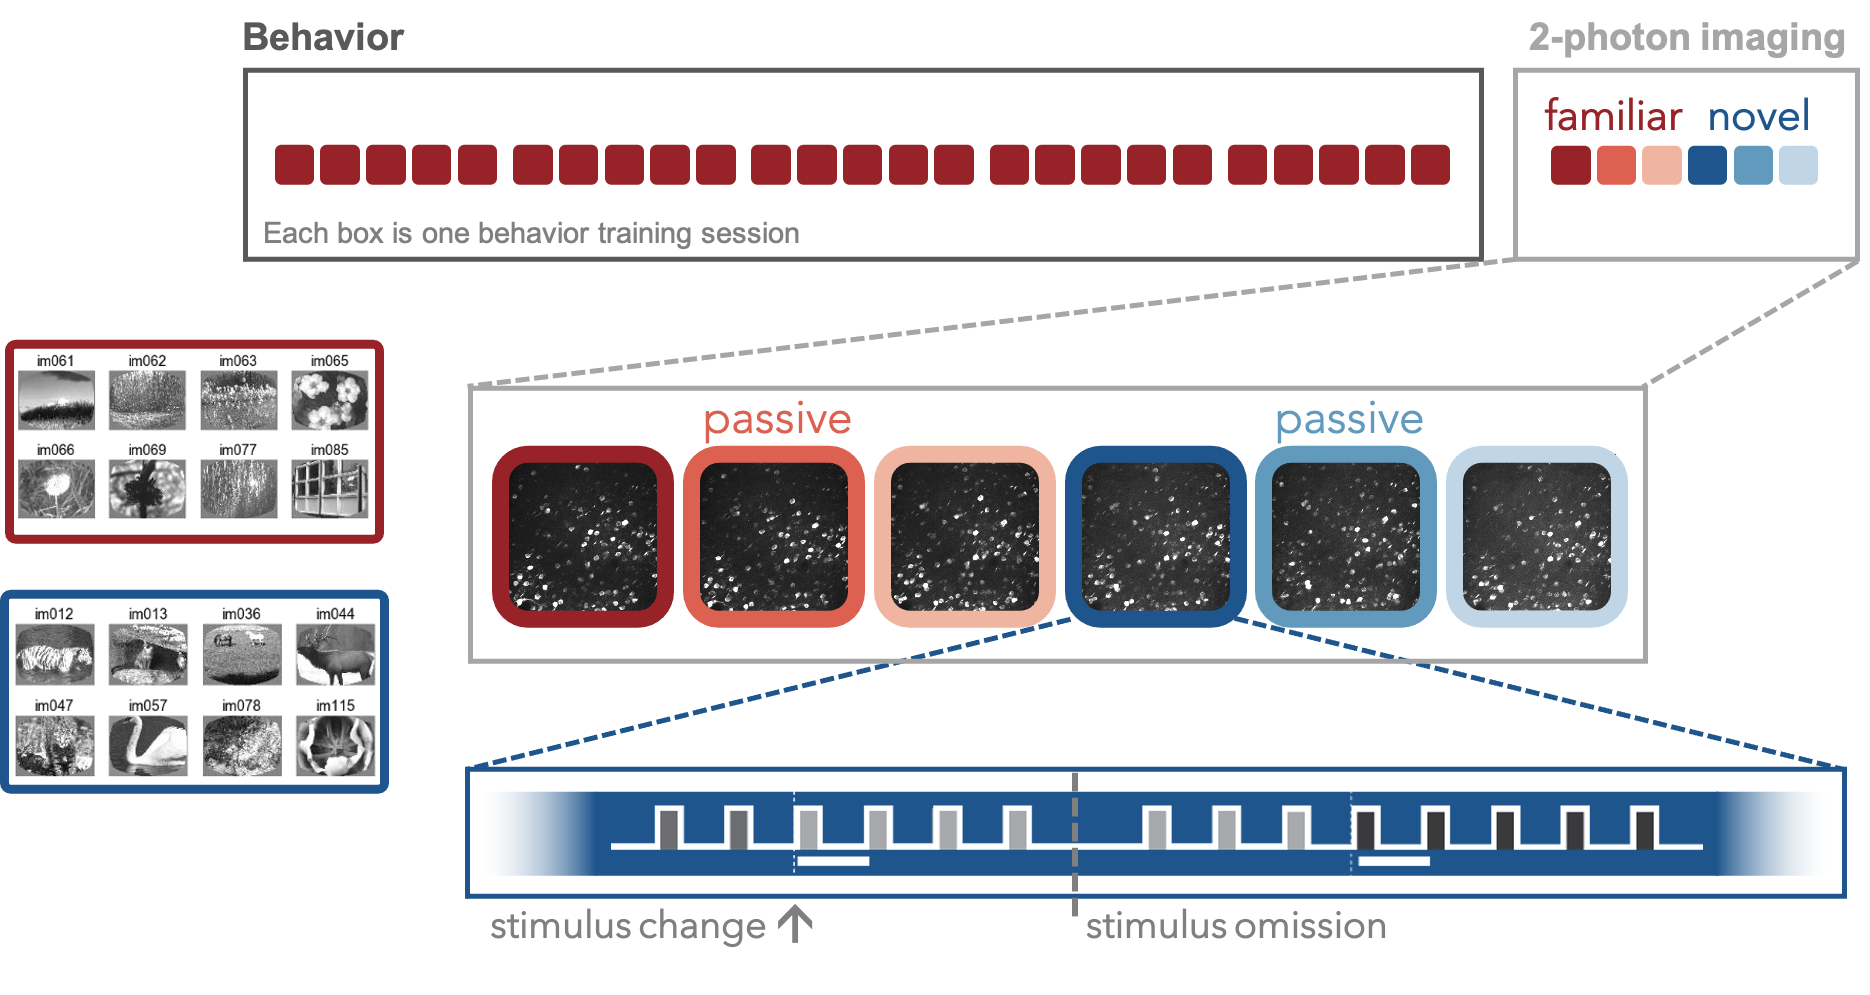

##### Multiple cortical areas and depths were measured concurently in each session, at a sample rate of 11Hz.
##### Data was collected from excitatory and inhibitory neural populations.

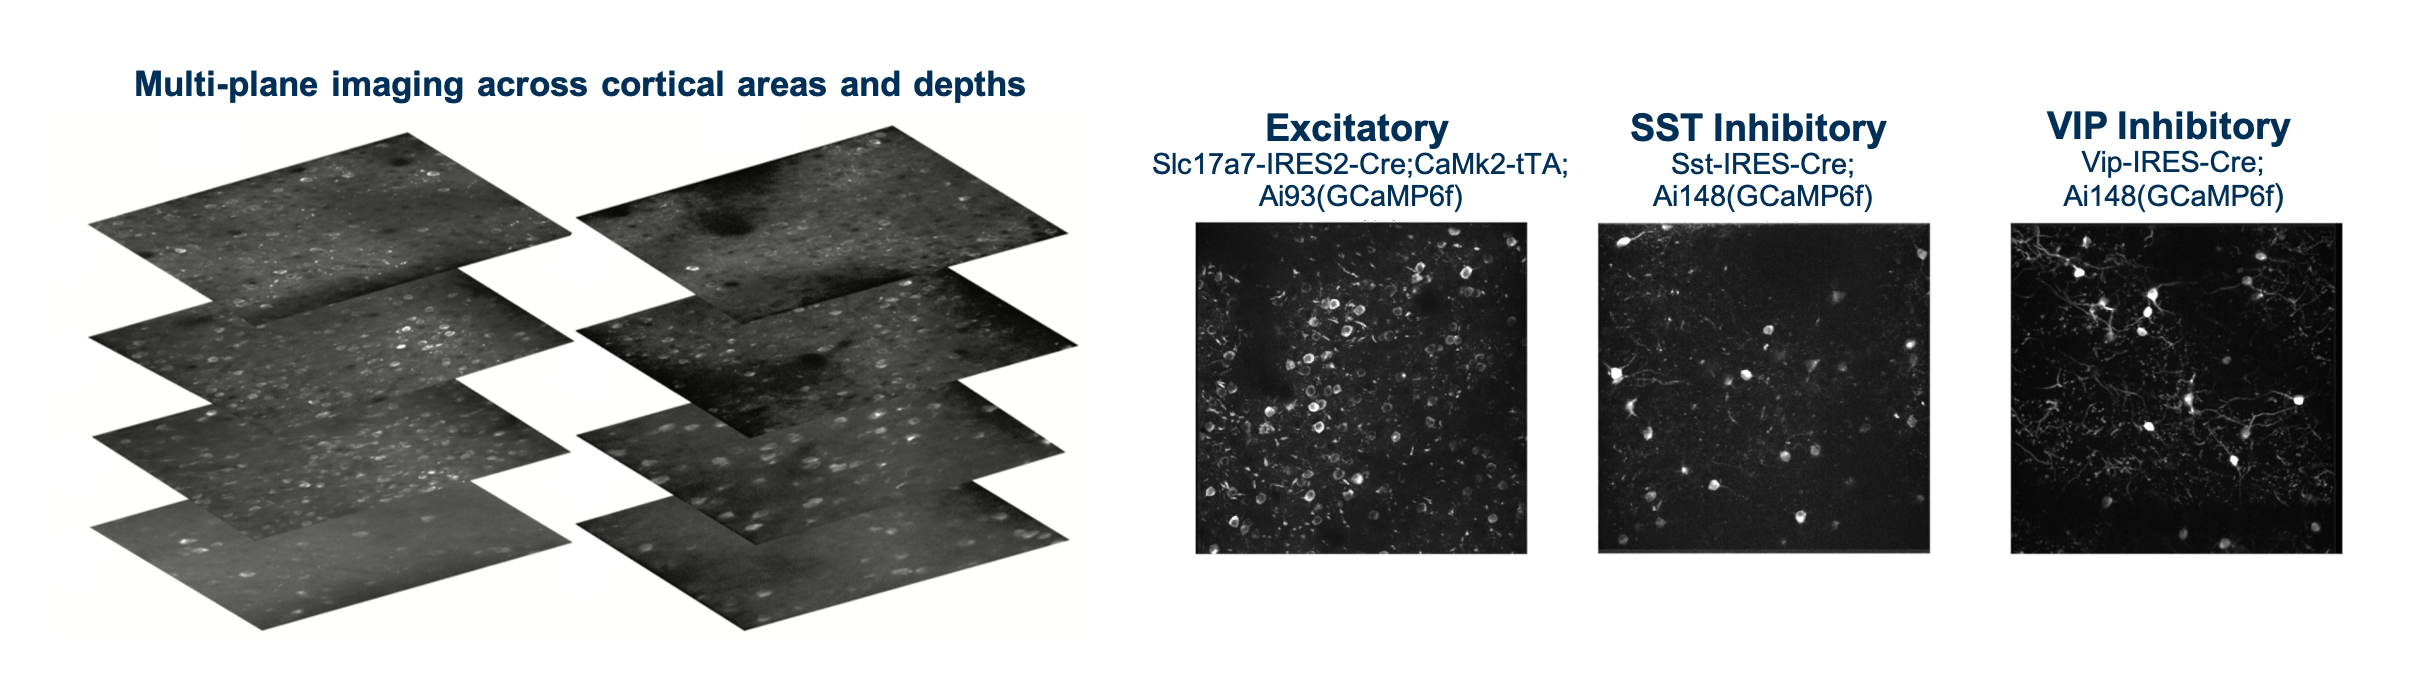

#### You can learn more about this dataset, behavioral task, and find other useful tools here:
#### [Overview page](https://allenswdb.github.io/physiology/ophys/visual-behavior/VB-Ophys.html) and [Allen Brain Atlas](allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html)
#### This example will focus on the activity of the two inhibitory types - VIP and SST neurons.

# Loading the data

In [14]:
# @title Install dependencies

!pip install pandas --quiet
!pip install seaborn --quiet
!pip install  pyarrow # may be needed to read data file

In [15]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook', font_scale=1.5, rc={'lines.markeredgewidth': 2})

## For this example, we have pre-computed event triggered responses and saved them to figshare.
#### To access the full dataset, see `Allen_neuromatch_example_2.ipynb`, or go to the links at the bottom of this notebook
###This cell will download the responses.

In [16]:
# @title Data retrieval
import os, requests

fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url = "https://ndownloader.figshare.com/files/28470255"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

### Then we open it using the pandas `read_parquet` method


(parquet is just another file format)

In [17]:
filename = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
data = pd.read_parquet(filename)

#### The data is organized as a pandas dataframe.
#### Each row contains all data for a given cell on a given trial


In [18]:
data.columns

Index(['stimulus_presentations_id', 'cell_specimen_id', 'trace',
       'trace_timestamps', 'mean_response', 'baseline_response', 'image_name',
       'image_index', 'is_change', 'omitted', 'mean_running_speed',
       'mean_pupil_area', 'response_latency', 'rewarded',
       'ophys_experiment_id', 'imaging_depth', 'targeted_structure',
       'cre_line', 'session_type', 'session_number', 'mouse_id',
       'ophys_session_id', 'ophys_container_id', 'behavior_session_id',
       'full_genotype', 'reporter_line', 'driver_line', 'indicator', 'sex',
       'age_in_days', 'exposure_level'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# selecting relevant features DataFrame
relevant_columns = ['mean_running_speed', 'mean_pupil_area', 'response_latency',
                    'mean_response', 'baseline_response']
df_relevant = data[relevant_columns].dropna()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_relevant)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

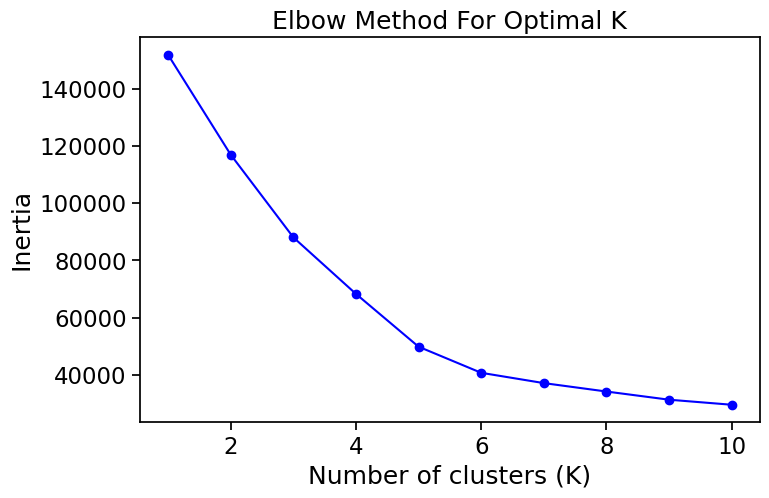

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [21]:
optimal_k = 3  # Replace this with the number determined from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_relevant['cluster'] = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

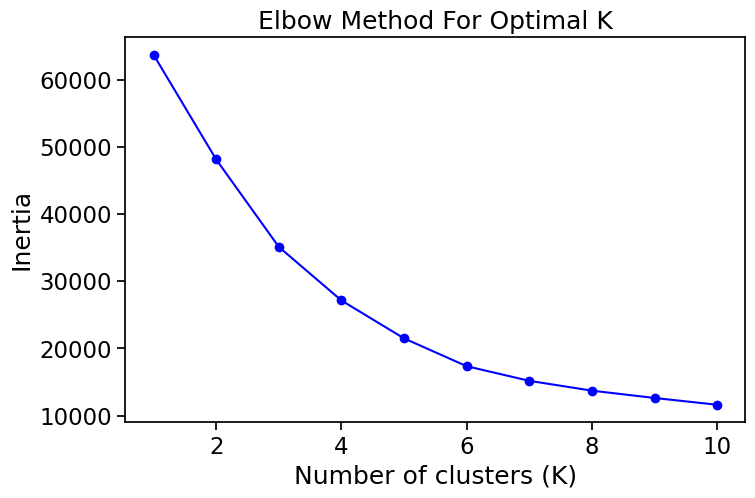

exposure_level  familiar  novel
cluster                        
0.0                 1876    621
1.0                 1840   1328
2.0                  614    161
3.0                 4502   1634
4.0                   60    113
exposure_level  familiar     novel
cluster                           
0.0             0.751302  0.248698
1.0             0.580808  0.419192
2.0             0.792258  0.207742
3.0             0.733703  0.266297
4.0             0.346821  0.653179


<ipython-input-40-510c37174985>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vip_data['cluster'] = pd.Series(index=data_relevant.index, data=data_relevant['cluster'])


<Figure size 1200x800 with 0 Axes>

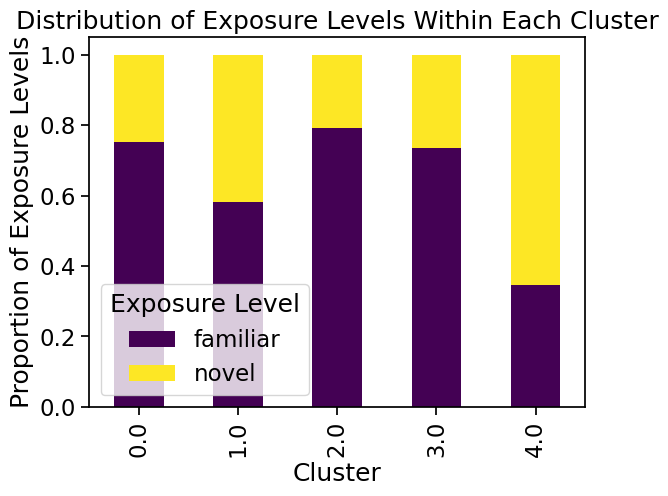

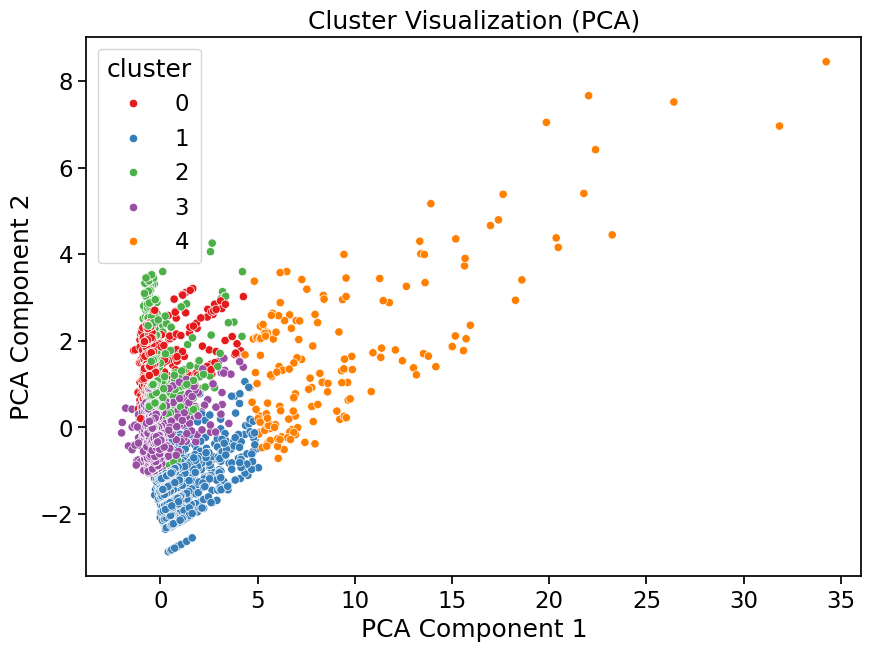

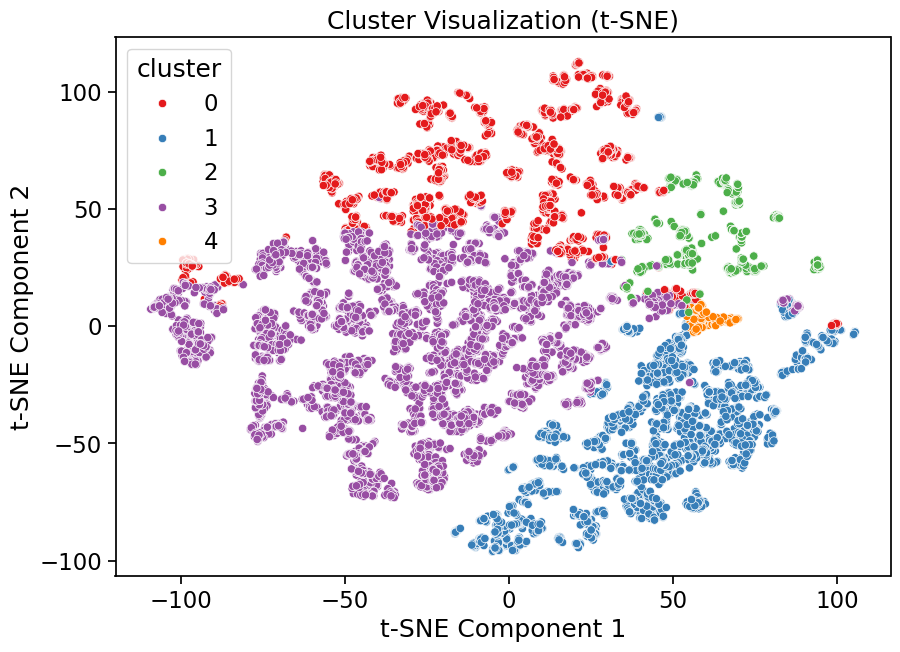

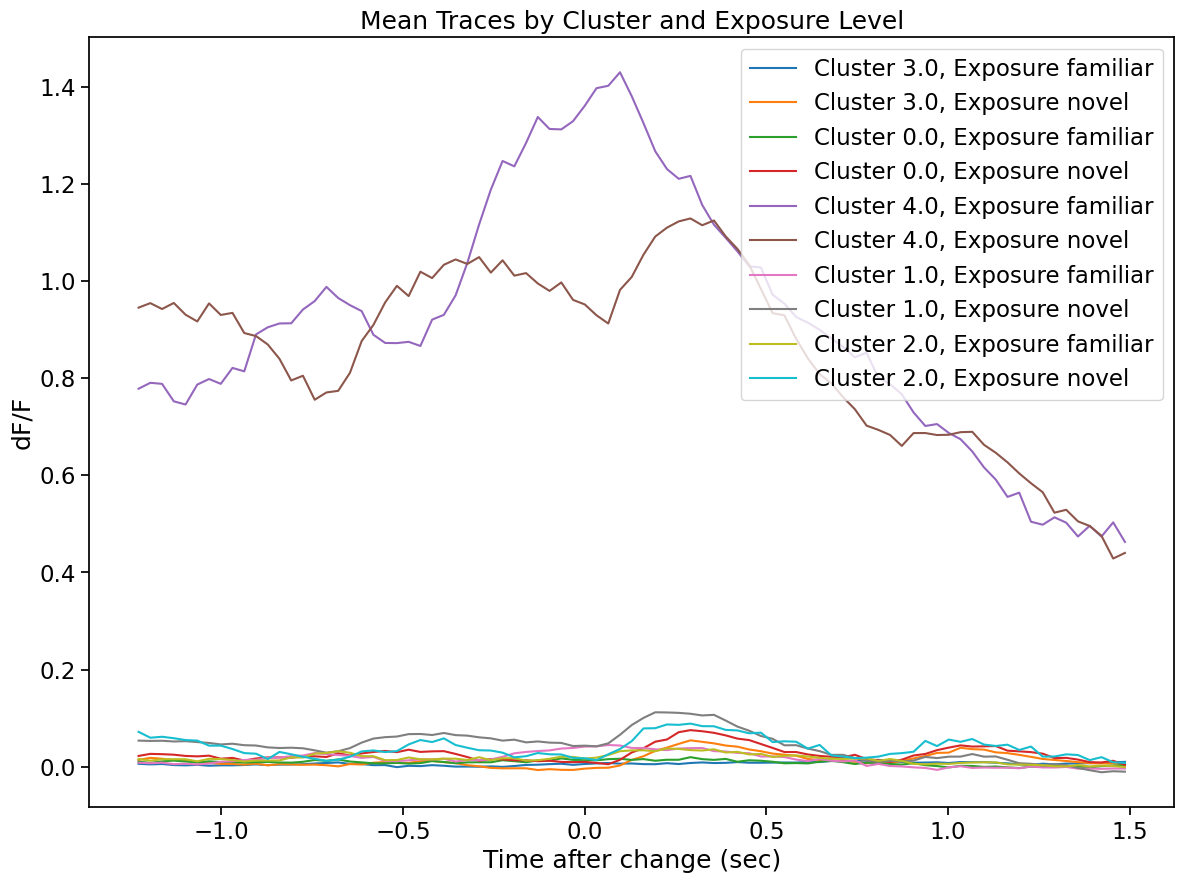

cluster                             0            1           2            3  \
mean_running_speed count  2497.000000  3168.000000  775.000000  6136.000000   
                   mean      3.875671    26.911665    2.171844     0.944421   
                   std       5.218272     5.372893    4.142646     2.067858   
                   min      -0.582869     2.648047   -2.238719    -1.601546   
                   25%       0.615652    23.981818    0.351892    -0.001566   
...                               ...          ...         ...          ...   
tsne2              min       0.305364   -96.213341    5.929386   -73.117111   
                   25%      47.182953   -69.495432   25.772292   -27.686721   
                   50%      63.658623   -48.349745   37.895878    -3.856606   
                   75%      82.364487   -28.079803   47.701563    13.459933   
                   max     112.856163    89.567551   64.575211    56.534775   

cluster                            4  
mean_running

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Relevant columns
relevant_columns = ['mean_running_speed', 'mean_pupil_area', 'response_latency', 'mean_response', 'baseline_response']
data_relevant = vip_data[relevant_columns].dropna()

# Standardizing the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_relevant)

# Elbow Method to find optimal K
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

# Optimal K is determined from elbow test
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
data_relevant['cluster'] = kmeans.fit_predict(data_scaled)

# Mapping cluster labels to the original DataFrame
vip_data['cluster'] = pd.Series(index=data_relevant.index, data=data_relevant['cluster'])

# Analyzing the relationship between clusters and exposure level
exposure_cluster_summary = vip_data.groupby(['cluster', 'exposure_level']).size().unstack().fillna(0)
print(exposure_cluster_summary)

# Normalizing to get the proportion of each exposure level within each cluster
exposure_cluster_summary_normalized = exposure_cluster_summary.div(exposure_cluster_summary.sum(axis=1), axis=0)
print(exposure_cluster_summary_normalized)

# Visualizing the distribution of exposure levels within each cluster
plt.figure(figsize=(12, 8))
exposure_cluster_summary_normalized.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribution of Exposure Levels Within Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Proportion of Exposure Levels')
plt.legend(title='Exposure Level')
plt.show()

# PCA for 2D visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data_relevant['pca1'] = data_pca[:, 0]
data_relevant['pca2'] = data_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data_relevant, palette='Set1')
plt.title('Cluster Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data_scaled)
data_relevant['tsne1'] = data_tsne[:, 0]
data_relevant['tsne2'] = data_tsne[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=data_relevant, palette='Set1')
plt.title('Cluster Visualization (t-SNE)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Function to visualize mean traces for each cluster based on exposure level
def plot_mean_traces_by_cluster(vip_data, trace_column, timestamps_column, cluster_column, exposure_level_column):
    timestamps = vip_data[timestamps_column].values[0]

    plt.figure(figsize=(14, 10))

    for cluster in vip_data[cluster_column].unique():
        cluster_data = vip_data[vip_data[cluster_column] == cluster]

        for exposure_level in cluster_data[exposure_level_column].unique():
            traces = cluster_data[cluster_data[exposure_level_column] == exposure_level][trace_column].values
            mean_trace = np.mean([trace for trace in traces], axis=0)
            plt.plot(timestamps, mean_trace, label=f'Cluster {cluster}, Exposure {exposure_level}')

    plt.title('Mean Traces by Cluster and Exposure Level')
    plt.xlabel('Time after change (sec)')
    plt.ylabel('dF/F')
    plt.legend()
    plt.show()

# Replace 'trace_column' and 'timestamps_column' with the appropriate columns in vip
plot_mean_traces_by_cluster(vip_data, 'trace', 'trace_timestamps', 'cluster', 'exposure_level')

# Descriptive statistics for each cluster
cluster_summary = data_relevant.groupby('cluster').describe().T
print(cluster_summary)


In [25]:
data.sample(5)

,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
758626,1577,1086490794,"[-0.0917767584323883, -0.1282850056886673, 0.0...","[-1.2281362613749274, -1.1958168860755871, -1....",0.064448,-0.011508,im031,6,True,False,...,992783847,989461845,992815106,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,145.0,familiar
1372443,4755,1086567589,"[-0.07511774450540543, -0.022805308923125267, ...","[-1.2282609373726978, -1.1959382811260477, -1....",0.003119,-0.041751,omitted,8,False,True,...,1004824790,1000740620,1004844648,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,165.0,familiar
1524521,4316,1086555432,"[-0.003662411356344819, 0.02666030265390873, 0...","[-1.2282367960132226, -1.1959147750655061, -1....",-0.024496,-0.083277,im065,0,True,False,...,1005018474,1000740620,1005032062,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,166.0,novel
524221,985,1086501134,"[-0.02450919896364212, -0.06820552796125412, -...","[-1.2279363490103425, -1.1956222345627021, -1....",0.036596,-0.009744,omitted,8,False,True,...,993231283,991913246,993245074,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Vip-IRES-Cre],GCaMP6f,F,127.0,familiar
872839,4017,1086490839,"[-0.008206017315387726, -0.026222489774227142,...","[-1.2280155911465593, -1.1956993913795446, -1....",-0.048086,0.020728,omitted,8,False,True,...,993265436,989461845,993275724,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,148.0,novel



##### Available data includes:
*   The cell `trace` aligned to stimulus (or omission) onset in a [-1.25, 1.5] second window around onset time
    *   Cell traces are in units of delta F/F, the change in fluorescence relative to baseline
*   The `trace_timestamps` for each trial, aligned to stimulus or omission onset
*   The `mean_response` on a given trial in a 500ms window after stimulus onset
*   The `baseline_response` on a given trial in a 500ms window before stimulus onset
*   The `image_name` for each trial. Trials where the stimulus was omitted have `image_name` = `omitted`
*   The `mean_running_speed` in a 500ms window after stimulus onset
*   The `mean_pupil_area` in a 500ms window after stimulus onset
*   The `response_latency` when the mouse licked after stimulus onset
*   Whether or not the trial was `rewarded`
*   Whether or not the trial `is_change`
*   Whether or not the trial was `omitted`

#### Cell and session level metadata includes:

*   The `stimulus_presentations_id` indicating the trial number within the session
*   The `cell_specimen_id` which is the unique identifier for each cell (note that a cell can be imaged in multiple sessions; if that's the case, the same cell_specimen_id appears in multiple sessions)
*   The `cre_line` indicating the cell type
  *   `Sst-IRES-Cre` labels SST inhibitory cells
  *   `Vip-IRES-Cre` labels VIP inhibitory cells
  *   `Slc17a7-IRES-Cre` labels excitatory cells
*   The `imaging_depth` indicating the cortical depth where the cell was located
*   The `targeted_structure` indicating the cortical area the cell was from
*   The `session_type` indicating the session order and image set
*   The `exposure_level` which tells you whether the image set was familiar or novel
*   The `mouse_id` indicating which mouse the cell came from
*   The `ophys_session_id` indicating the recording day for that trial
*   The `ophys_experiment_id` indicating which imaging plane within the session that the cell came from
*   The `ophys_container_id` which links the same imaging plane recorded across multiple sessions. Cells that are imaged across multiple sessions will have the same `cell_specimen_id`.




### Let's check what is available


In [26]:
print('exposure_levels:', data.exposure_level.unique())

exposure_levels: ['familiar' 'novel']


In [27]:
print('stimulus presentations can be changes:', data.is_change.unique())

stimulus presentations can be changes: [ True False]


In [28]:
print('stimulus presentations can be omitted:', data.omitted.unique())

stimulus presentations can be omitted: [False  True]


In [29]:
print('cre lines (cell types) included in this dataset are:', data.cre_line.unique())

cre lines (cell types) included in this dataset are: ['Sst-IRES-Cre' 'Vip-IRES-Cre']


In [30]:
print('there are', len(data.mouse_id.unique()), 'mice in this dataset')

there are 13 mice in this dataset


In [31]:
print('there are', len(data.ophys_session_id.unique()), 'sessions in this dataset')

there are 25 sessions in this dataset



# How are VIP and SST cells affected by stimulus novelty?

### Plot the population average change response for familiar and novel images for each cre line

Get trials where the image identity changed, for SST and VIP cells

In [32]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.is_change == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.is_change == True)]

Plot the population average change response of SST cells for familiar and novel images

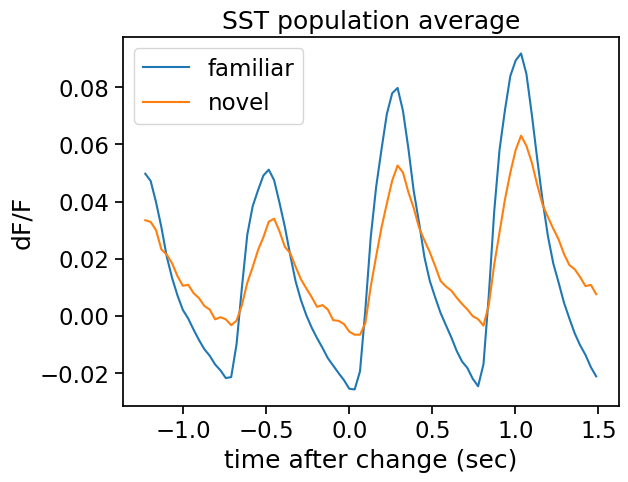

In [33]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot the population average change response of VIP cells for familiar and novel images

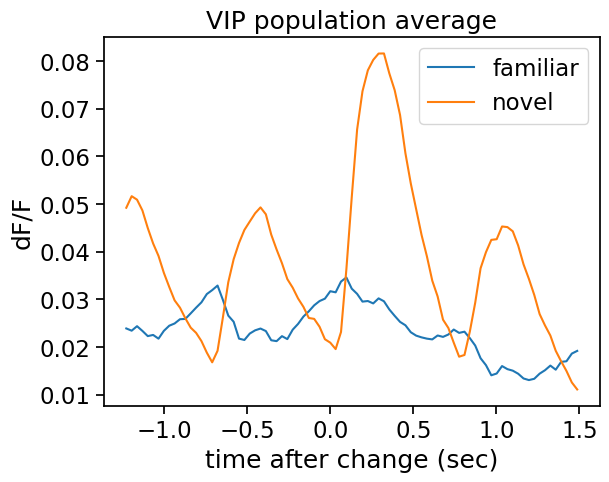

In [34]:
timestamps = vip_data.trace_timestamps.values[0]
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level==exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### Can you find cells that were imaged across multiple sessions? How do single cells change depending on the image set?

In [35]:
# which cells are in more than one session? make a list
cells_in_multiple_sessions = []
for cell_specimen_id in vip_data.cell_specimen_id.unique():
  if len(vip_data[vip_data.cell_specimen_id == cell_specimen_id].ophys_session_id.unique()) > 1:
    cells_in_multiple_sessions.append(cell_specimen_id)

print(cells_in_multiple_sessions)

[1086495458, 1086495538, 1086495170, 1086495264, 1086496225, 1086495925, 1086495377, 1086496359, 1086496472, 1086496547, 1086496681, 1086497031, 1086496844, 1086500839, 1086500898, 1086500959, 1086501038, 1086501134, 1086501280, 1086501226, 1086501454, 1086501538, 1086501601, 1086501688, 1086489847, 1086489860, 1086489891, 1086558904, 1086556416, 1086555432, 1086559188, 1086555190, 1086567589, 1086559446, 1086567897, 1086558341, 1086556696, 1086561830, 1086557997, 1086559782, 1086560048, 1086567017, 1086557082, 1086556094, 1086563032, 1086563829, 1086560926, 1086561466, 1086562430, 1086560592, 1086566230, 1086566746, 1086563384, 1086562780, 1086565528, 1086497765, 1086498401, 1086498125, 1086499101, 1086498544, 1086498699, 1086498800, 1086498889, 1086498976]


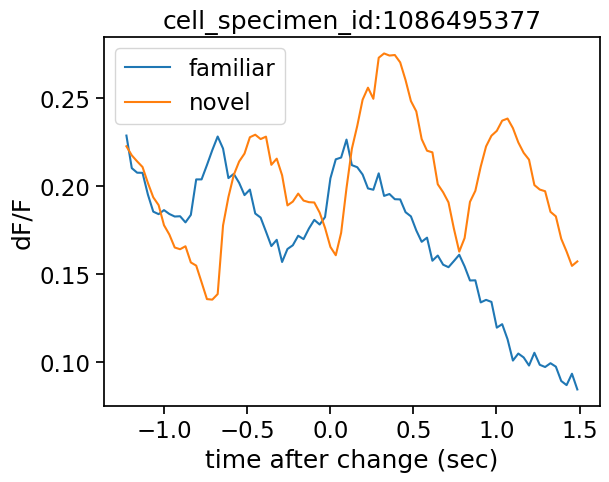

In [36]:
# this one looks like the population average
example_cell_specimen_id = cells_in_multiple_sessions[6]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

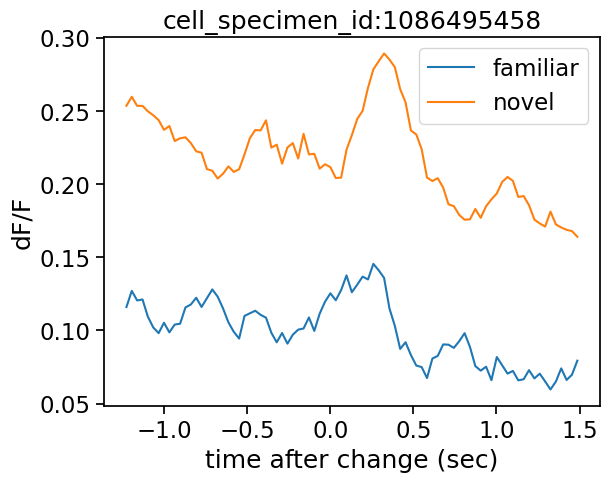

In [37]:
# this one does not look like the population average
example_cell_specimen_id = cells_in_multiple_sessions[0]

cell_data = vip_data[vip_data.cell_specimen_id==example_cell_specimen_id]
timestamps = cell_data.trace_timestamps.values[0]
for exposure_level in cell_data.exposure_level.unique():
  mean_trace = cell_data[cell_data.exposure_level == exposure_level].trace.mean()
  plt.plot(timestamps, mean_trace, label=exposure_level)
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

### What about trial to trial variability? How does the response of a single cell vary across a session?



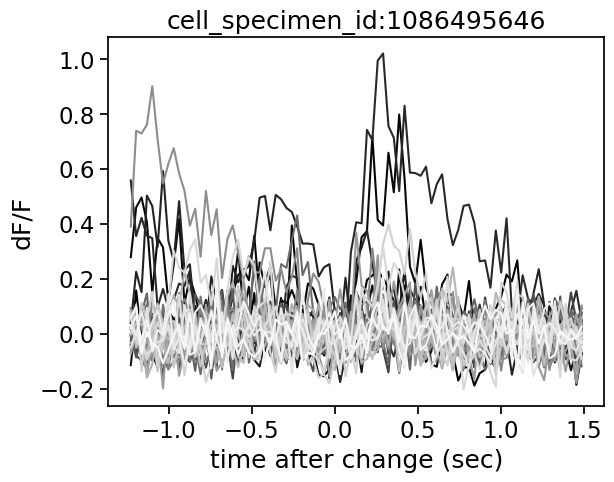

In [38]:
# let's pick a cell from a novel image session
example_cell_specimen_id = vip_data[vip_data.exposure_level=='novel'].cell_specimen_id.unique()[7]

cell_data = vip_data[vip_data.cell_specimen_id == example_cell_specimen_id]
cell_data = cell_data[(cell_data.image_name == cell_data.image_name.unique()[2])]

offset = 1 / len(cell_data.stimulus_presentations_id.unique())
color = [0, 0, 0]

for i, stimulus_presentations_id in enumerate(cell_data.stimulus_presentations_id.unique()):
  trial_data = cell_data[cell_data.stimulus_presentations_id == stimulus_presentations_id]
  timestamps = trial_data.trace_timestamps.values[0]
  trace = trial_data.trace.values[0]
  plt.plot(timestamps, trace, color = color)
  color = [color[0] + offset, color[1] + offset, color[2] + offset]
plt.title(f'cell_specimen_id:{example_cell_specimen_id}')
plt.xlabel('time after change (sec)')
plt.ylabel('dF/F')
plt.show()

# How do SST and VIP cells respond when stimuli are omitted?¶

### Plot the population average response to stimulus omission

Get trials where the stimulus was omitted, for SST and VIP cells

In [ ]:
sst_data = data[(data.cre_line == 'Sst-IRES-Cre')&(data.omitted == True)]
vip_data = data[(data.cre_line == 'Vip-IRES-Cre')&(data.omitted == True)]

Plot the population average omission response of SST cells for familiar and novel images

In [ ]:
timestamps = sst_data.trace_timestamps.values[0]
for exposure_level in sst_data.exposure_level.unique():
  traces = sst_data[sst_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('SST population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Plot population average omission response of VIP cells for familiar and novel images

In [ ]:
timestamps = vip_data.trace_timestamps.values[0]  # trace timestamps are relative to stimulus onset
for exposure_level in vip_data.exposure_level.unique():
  traces = vip_data[vip_data.exposure_level == exposure_level].trace.values
  plt.plot(timestamps, np.mean(traces), label=exposure_level)
plt.title('VIP population average')
plt.xlabel('time after omission (sec)')
plt.ylabel('dF/F')
plt.legend()
plt.show()

Does the omission response correlate with behavior?

How do the dynamics of image and omission evoked activity change over time during the novel image session?

### To learn how to use the AllenSDK to access the full dataset, and see more in depth examples of how to interact with the data, check out the additional tutorials here:

https://colab.research.google.com/drive/163dPehppRK6JeHypgfB3gyaGQqKshNQc?usp=sharing

and in the 'Getting Started' section here:

https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html


